# Yuumi Insurance EDA
Explore the insurance data with the aim of finding insights in the data

In [1]:
# import basic libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
%matplotlib inline

# data visualisation
#import missingno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')

# preprocessing - encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from nltk.tokenize import WordPunctTokenizer



# 1. Clean/Process Data

In [2]:
# make column width bigger when displaying columns
pd.set_option("display.max_colwidth", 1000)

In [3]:
# load in log data with time taken to load recorded
start_time = time.time()
log = pd.read_csv('Dataset/data.csv')
log_time = (time.time() - start_time)
log_time

28.78792905807495

In [4]:
# look at data, we can check the columns by log.message/log.timestamp
# also log.message[0] shows first value for log.message
log.head(20)

,message,timestamp
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,1.483193e+09
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",1.483194e+09
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,1.483194e+09
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,1.483194e+09
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,1.483196e+09
5,"6859e40fdc3f40d - pc_browser - Quote Completed for customer: 9bae09 with json payload {'name': 'Brandi Harris', 'email': 'Brandi Harris@duncan.com', 'gender': 'male', 'age': 62, 'home': {'type': 1, 'square_footage': 523.4329572865342, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Michael Harris', 'age': 12, 'gender': 'male'}, {'name': 'Michael Harris', 'age': 7, 'gender': 'male'}], 'address': '60 West Lisaside, Jamie Port Suite '}",1.483197e+09
6,4c9ab2942b484f2 - pc_browser - Claim Started for customer: 9bae09,1.483197e+09
7,07ba7defa6444ba - pc_browser - Payment Completed for customer: 9bae09,1.483197e+09
8,cb6d5db3f2ce478 - pc_browser - Quote Started for customer: 12fdce,1.483200e+09
9,0ddb305e024d49f - pc_browser - Quote Started for customer: b7aab4,1.483200e+09


In [5]:
# shows columns and the data types of columns
log.dtypes

message       object
timestamp    float64
dtype: object

In [6]:
# create data frame which will store new column names from log data
timelog = pd.DataFrame()

In [7]:
# function for converting time into datetime (local)
def convert_time(d):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(d))

In [8]:
# put the timestamp column from log data into new timelog dataframe, while also converting it to datetime format
timelog['timestamp'] = log['timestamp'].apply(convert_time)

In [9]:
# functions to get the date and the time separately
def get_date(d):
    return d[:10]
def get_time(d):
    return d[11:]

In [10]:
# put date and time into timelog df
timelog['DATE'] = timelog.timestamp.apply(get_date)
timelog['TIME'] = timelog.timestamp.apply(get_time)

In [11]:
timelog.head()

,timestamp,DATE,TIME
0,2017-01-01 01:00:00,2017-01-01,01:00:00
1,2017-01-01 01:14:36,2017-01-01,01:14:36
2,2017-01-01 01:16:34,2017-01-01,01:16:34
3,2017-01-01 01:16:34,2017-01-01,01:16:34
4,2017-01-01 02:00:00,2017-01-01,02:00:00


In [12]:
# create msglog for manipulating message data
msglog = pd.DataFrame()
msglog['message'] = log['message']

In [48]:
msglog.head()

,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
# split message, put into new variable, new columns for transaction id, device 
splitmsg1 = pd.DataFrame(log.message.str.split('-',2).tolist(), columns = ['transaction_id', 'device', 'message'])

In [15]:
splitmsg1.head(20)

,transaction_id,device,message
0,8f70c7577be8483,mobile_browser,Quote Started for customer: 99ccf1
1,1368d40a4f6e455,mobile_browser,"Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}"
2,90527688b31d445,mobile_browser,Claim Started for customer: 99ccf1
3,c4013f44ea6d40c,mobile_browser,Payment Completed for customer: 99ccf1
4,8045614075e7466,pc_browser,Quote Started for customer: 9bae09
5,6859e40fdc3f40d,pc_browser,"Quote Completed for customer: 9bae09 with json payload {'name': 'Brandi Harris', 'email': 'Brandi Harris@duncan.com', 'gender': 'male', 'age': 62, 'home': {'type': 1, 'square_footage': 523.4329572865342, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Michael Harris', 'age': 12, 'gender': 'male'}, {'name': 'Michael Harris', 'age': 7, 'gender': 'male'}], 'address': '60 West Lisaside, Jamie Port Suite '}"
6,4c9ab2942b484f2,pc_browser,Claim Started for customer: 9bae09
7,07ba7defa6444ba,pc_browser,Payment Completed for customer: 9bae09
8,cb6d5db3f2ce478,pc_browser,Quote Started for customer: 12fdce
9,0ddb305e024d49f,pc_browser,Quote Started for customer: b7aab4


In [16]:
# from remaining message in splitmsg1, split the action from remaining message into splitmsg2
splitmsg2 = pd.DataFrame(splitmsg1.message.str.split(':',1).tolist(), columns = ['action', 'message'])
splitmsg2['customer_id'] = splitmsg2['message'].str.split().str[0]

In [17]:
msglog['customer_id'] = splitmsg2['customer_id']
splitmsg2.head(20)

,action,message,customer_id
0,Quote Started for customer,99ccf1,99ccf1
1,Quote Completed for customer,"99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",99ccf1
2,Claim Started for customer,99ccf1,99ccf1
3,Payment Completed for customer,99ccf1,99ccf1
4,Quote Started for customer,9bae09,9bae09
5,Quote Completed for customer,"9bae09 with json payload {'name': 'Brandi Harris', 'email': 'Brandi Harris@duncan.com', 'gender': 'male', 'age': 62, 'home': {'type': 1, 'square_footage': 523.4329572865342, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Michael Harris', 'age': 12, 'gender': 'male'}, {'name': 'Michael Harris', 'age': 7, 'gender': 'male'}], 'address': '60 West Lisaside, Jamie Port Suite '}",9bae09
6,Claim Started for customer,9bae09,9bae09
7,Payment Completed for customer,9bae09,9bae09
8,Quote Started for customer,12fdce,12fdce
9,Quote Started for customer,b7aab4,b7aab4


In [18]:
# put all the data together
msglog['transaction_id'] = splitmsg1['transaction_id']
msglog['device'] = splitmsg1['device']
msglog['action'] = splitmsg2['action']
msglog.head(20)

,message,customer_id,transaction_id,device,action
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer
5,"6859e40fdc3f40d - pc_browser - Quote Completed for customer: 9bae09 with json payload {'name': 'Brandi Harris', 'email': 'Brandi Harris@duncan.com', 'gender': 'male', 'age': 62, 'home': {'type': 1, 'square_footage': 523.4329572865342, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Michael Harris', 'age': 12, 'gender': 'male'}, {'name': 'Michael Harris', 'age': 7, 'gender': 'male'}], 'address': '60 West Lisaside, Jamie Port Suite '}",9bae09,6859e40fdc3f40d,pc_browser,Quote Completed for customer
6,4c9ab2942b484f2 - pc_browser - Claim Started for customer: 9bae09,9bae09,4c9ab2942b484f2,pc_browser,Claim Started for customer
7,07ba7defa6444ba - pc_browser - Payment Completed for customer: 9bae09,9bae09,07ba7defa6444ba,pc_browser,Payment Completed for customer
8,cb6d5db3f2ce478 - pc_browser - Quote Started for customer: 12fdce,12fdce,cb6d5db3f2ce478,pc_browser,Quote Started for customer
9,0ddb305e024d49f - pc_browser - Quote Started for customer: b7aab4,b7aab4,0ddb305e024d49f,pc_browser,Quote Started for customer


In [19]:
msglog.action.value_counts()

 Claim Started for customer        826795
 Claim Accepted for customer       816301
 Quote Started for customer        632998
 Quote Completed for customer      523322
 Payment Completed for customer    225921
 Policy Cancelled for customer     156327
 Quote Incomplete for customer     109676
 Claim Denied for customer          10494
Name: action, dtype: int64

In [20]:
msglog.dtypes

message           object
customer_id       object
transaction_id    object
device            object
action            object
dtype: object

In [21]:
# look for values in column action with denied message
denied = msglog['action']==" Claim Denied for customer"
denied.head(15)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
Name: action, dtype: bool

In [22]:
# just denied claims
denied_claims = msglog[denied]
denied_claims.head()

,message,customer_id,transaction_id,device,action
14,e6cd8ce31a1d4d6 - mobile_browser - Claim Denied for customer: 99ccf1 - reason : fraud,99ccf1,e6cd8ce31a1d4d6,mobile_browser,Claim Denied for customer
17,e67b69c9b4554c0 - pc_browser - Claim Denied for customer: b7aab4 - reason : fraud,b7aab4,e67b69c9b4554c0,pc_browser,Claim Denied for customer
29,58891c5466d240b - pc_browser - Claim Denied for customer: 2bc68b - reason : fraud,2bc68b,58891c5466d240b,pc_browser,Claim Denied for customer
44,94270be3a7f440a - mobile_browser - Claim Denied for customer: 48802d - reason : fraud,48802d,94270be3a7f440a,mobile_browser,Claim Denied for customer
86,a699b8150503414 - pc_browser - Claim Denied for customer: 3b8ce8 - reason : fraud,3b8ce8,a699b8150503414,pc_browser,Claim Denied for customer


In [23]:
msglog.head(20)

,message,customer_id,transaction_id,device,action
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer
5,"6859e40fdc3f40d - pc_browser - Quote Completed for customer: 9bae09 with json payload {'name': 'Brandi Harris', 'email': 'Brandi Harris@duncan.com', 'gender': 'male', 'age': 62, 'home': {'type': 1, 'square_footage': 523.4329572865342, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Michael Harris', 'age': 12, 'gender': 'male'}, {'name': 'Michael Harris', 'age': 7, 'gender': 'male'}], 'address': '60 West Lisaside, Jamie Port Suite '}",9bae09,6859e40fdc3f40d,pc_browser,Quote Completed for customer
6,4c9ab2942b484f2 - pc_browser - Claim Started for customer: 9bae09,9bae09,4c9ab2942b484f2,pc_browser,Claim Started for customer
7,07ba7defa6444ba - pc_browser - Payment Completed for customer: 9bae09,9bae09,07ba7defa6444ba,pc_browser,Payment Completed for customer
8,cb6d5db3f2ce478 - pc_browser - Quote Started for customer: 12fdce,12fdce,cb6d5db3f2ce478,pc_browser,Quote Started for customer
9,0ddb305e024d49f - pc_browser - Quote Started for customer: b7aab4,b7aab4,0ddb305e024d49f,pc_browser,Quote Started for customer


In [24]:
import json
from pandas.io.json import json_normalize
#json_normalize(msglog['message'])

In [25]:
#split message into json_payload and message
splitmsg3 = pd.DataFrame()
splitmsg3['message'] = msglog['message'].str.split('json payload',1).str[0]
splitmsg3['json_payload'] = msglog['message'].str.split('json payload',1).str[1]

In [26]:
#read json_payload and message into msglog
msglog['json_payload'] = splitmsg3['json_payload']
msglog['message'] = splitmsg3['message']

In [27]:
#different types of quotes
msglog['action'].value_counts()

 Claim Started for customer        826795
 Claim Accepted for customer       816301
 Quote Started for customer        632998
 Quote Completed for customer      523322
 Payment Completed for customer    225921
 Policy Cancelled for customer     156327
 Quote Incomplete for customer     109676
 Claim Denied for customer          10494
Name: action, dtype: int64

In [28]:
#create columns (initialise to None)
msglog['name'] = np.nan
msglog['email'] = np.nan
msglog['gender'] = np.nan
msglog['home'] = np.nan
msglog['age'] = np.nan
msglog['household'] = np.nan
msglog['address'] = np.nan
msglog['fraud'] = 0

msglog.head()

,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [29]:
#for testing purposes create test dataframe using the 5 entries from msglog (cause faster)
test = msglog.head(100)
test.head()

,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
def JSON_to_dataframe(dataframe, column_name, begins_with):
    
    """
    function to extract relevant data from string and add them to dataframe.
    
    Data extracted from column name specified by column_name and entered into dataframe at 
    
    column = begins_with + [name extracted from JSON string].
    
    """
    
    for row in range(dataframe.shape[0]):
        
        #find string
        string = str(dataframe.loc[row, column_name])
    
        #if string contains a {
        if(string.find("{")!=-1):

            #replace all single quotes with double quotes (doesn't work otherwise idk why)
            string = string.replace("'", '"')
            #print(string)

            #read data into json parser
            data = json.loads(string)  

            #json_normalize(substr)
            #print(data)

            #copy name, email etc. into relevant columns
            for keys in data.keys():

                #column
                column = begins_with + str(keys)

                #copy name, email etc. into dataframe
                dataframe.loc[row, column] = str(data[str(keys)])


In [31]:
def add_fraud_col(dataframe):
    
    """function that reads the message column in dataframe and adds a fraud column to dataframe. 
    1 is fraudulent, 0 is non-fraudulent"""
    
    for row in range(dataframe.shape[0]):

        #find string
        string = str(dataframe.loc[row, 'message'])
        
        #print(string)
        #if string contains a fraud
        if(string.find("fraud")!=-1):
            
            dataframe['fraud'][row] = 1
            

In [49]:
def switch_test_msglog(dataframe):
    
    "function that helps switch between test df and msglog df"

    #extract data from json_payload
    JSON_to_dataframe(dataframe = dataframe, column_name = 'json_payload', begins_with = '')

    #extract data from home
    JSON_to_dataframe(dataframe = dataframe, column_name = 'home', begins_with = 'home_')
    
    #add fradulent column
    add_fraud_col(dataframe)

    #drop unnecessary columns
    if('message' in dataframe.columns): 
        dataframe = dataframe.drop('message', axis=1)
    if('json_payload' in dataframe.columns): 
        dataframe = dataframe.drop('json_payload', axis=1)
    if('home' in dataframe.columns): 
        dataframe = dataframe.drop('home', axis=1)
    
switch_test_msglog(test)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [50]:
test.head()

,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",Nicole Berry,Nicole Berry@hotmail.com,male,"{'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}",29,"[{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}]","66 Lake Jamieview,PSC",0,1,311.80361967382737,2,1
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [51]:
#group by customer_id
grouped = test.groupby(["transaction_id", "device", "action", "name", "email", "gender", "age", "household", "address", "home_type", "home_square_footage", "home_number_of_bedrooms", "home_number_of_floors"], as_index = False)[["customer_id"]].sum()
grouped.head()

,transaction_id,device,action,name,email,gender,age,household,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,customer_id
0,0380426b59bd4aa,pc_browser,Quote Completed for customer,Cheryl Cox,Cheryl Cox@hotmail.com,male,38,[],"121 Brooksfort, Miranda Ports Suite",1,292.3682909853186,3,1,0e3a85
1,038c128af31447d,mobile_app,Quote Completed for customer,Bianca Williams,Bianca Williams@guerrero-santana.biz,female,69,"[{'name': 'Amy Williams', 'age': 70, 'gender': 'female'}]","106 West Lisaside,USNS Sharp",1,410.3074027759183,1,1,053c49
2,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"[{'name': 'Linda Parker', 'age': 39, 'gender': 'male'}, {'name': 'Natalie Booker', 'age': 41, 'gender': 'male'}, {'name': 'Kelly Mclaughlin', 'age': 53, 'gender': 'female'}, {'name': 'Jimmy Johnson', 'age': 46, 'gender': 'female'}, {'name': 'Timothy Park', 'age': 45, 'gender': 'male'}, {'name': 'Wayne Parker', 'age': 5, 'gender': 'male'}, {'name': 'Lynn Parker', 'age': 14, 'gender': 'female'}]","99 South John, James Village",1,298.02484253349604,3,1,0bcc51
3,0baaef67fe8a458,pc_browser,Quote Completed for customer,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,"[{'name': 'Zachary Steele', 'age': 48, 'gender': 'male'}, {'name': 'Nicholas Steele', 'age': 9, 'gender': 'male'}, {'name': 'Michael Steele', 'age': 12, 'gender': 'female'}]","73 Edwardfurt, Michelle Crossing Suite",1,301.854949906065,3,1,2bc68b
4,0f0543abc8bf445,mobile_browser,Quote Completed for customer,Cynthia Garcia,Cynthia Garcia@anderson-sutton.com,female,25,"[{'name': 'Paige Garcia', 'age': 24, 'gender': 'female'}]","43 Edwardfurt, Patricia Mountains",1,310.0469132546419,3,1,d175a5


In [52]:
customer_fraud = test[['customer_id', 'fraud']]

In [53]:
#group fraudulent customers by 'customer_id' (probs a better method tbh)
fraudulent = customer_fraud.pivot_table(index=['customer_id'], aggfunc=sum)
fraudulent['customer_id1'] = fraudulent.index
fraudulent.index = range(fraudulent.shape[0])
fraudulent.head()

,fraud,customer_id1
0,0,053c49
1,0,0bcc51
2,0,0e3a85
3,0,12fdce
4,0,194b04


In [54]:
#merge df: 'grouped' and 'fraudulent' on 'customer_id'
merged = pd.merge(grouped, fraudulent, left_on='customer_id', right_on='customer_id1', how='left').drop('customer_id1',axis = 1)
merged.head()

,transaction_id,device,action,name,email,gender,age,household,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,customer_id,fraud
0,0380426b59bd4aa,pc_browser,Quote Completed for customer,Cheryl Cox,Cheryl Cox@hotmail.com,male,38,[],"121 Brooksfort, Miranda Ports Suite",1,292.3682909853186,3,1,0e3a85,0
1,038c128af31447d,mobile_app,Quote Completed for customer,Bianca Williams,Bianca Williams@guerrero-santana.biz,female,69,"[{'name': 'Amy Williams', 'age': 70, 'gender': 'female'}]","106 West Lisaside,USNS Sharp",1,410.3074027759183,1,1,053c49,0
2,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"[{'name': 'Linda Parker', 'age': 39, 'gender': 'male'}, {'name': 'Natalie Booker', 'age': 41, 'gender': 'male'}, {'name': 'Kelly Mclaughlin', 'age': 53, 'gender': 'female'}, {'name': 'Jimmy Johnson', 'age': 46, 'gender': 'female'}, {'name': 'Timothy Park', 'age': 45, 'gender': 'male'}, {'name': 'Wayne Parker', 'age': 5, 'gender': 'male'}, {'name': 'Lynn Parker', 'age': 14, 'gender': 'female'}]","99 South John, James Village",1,298.02484253349604,3,1,0bcc51,0
3,0baaef67fe8a458,pc_browser,Quote Completed for customer,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,"[{'name': 'Zachary Steele', 'age': 48, 'gender': 'male'}, {'name': 'Nicholas Steele', 'age': 9, 'gender': 'male'}, {'name': 'Michael Steele', 'age': 12, 'gender': 'female'}]","73 Edwardfurt, Michelle Crossing Suite",1,301.854949906065,3,1,2bc68b,1
4,0f0543abc8bf445,mobile_browser,Quote Completed for customer,Cynthia Garcia,Cynthia Garcia@anderson-sutton.com,female,25,"[{'name': 'Paige Garcia', 'age': 24, 'gender': 'female'}]","43 Edwardfurt, Patricia Mountains",1,310.0469132546419,3,1,d175a5,0


In [55]:
import ast

def household_to_dataframe(dataframe):
    
    """function to create dataframe from household column"""
    
    #create new df
    new_df = pd.DataFrame(columns = ['customer_id', 'name', 'age', 'gender'])
    
    for row in range(dataframe.shape[0]):
        
        #print("rows = {}".format(row))
        #print("length = {}".format(dataframe.shape[0]))
        
        #get current string
        string = dataframe['household'][row]
        
        #save customer_id
        customer_id = dataframe['customer_id'][row]
        
        #convert string to dict
        dictionary = ast.literal_eval(string)
        
        #use json_normalize to create df 
        normalized_frame = json_normalize(data = dictionary)
        
        #read in customer_id
        normalized_frame['customer_id'] = customer_id
        
        #print(normalized_frame)
        
        #append json_normalize df to new_df
        new_df = new_df.append(normalized_frame, ignore_index = True)
        
        #print(new_df)
        
    return new_df
        
occupants_df = household_to_dataframe(merged)

#rename column headings
occupants_df = occupants_df.rename(index=str, columns={"age": "occupant_age", "gender": "occupant_gender", "name": "occupant_name"})
occupants_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,occupant_age,customer_id,occupant_gender,occupant_name
0,70,053c49,female,Amy Williams
1,39,0bcc51,male,Linda Parker
2,41,0bcc51,male,Natalie Booker
3,53,0bcc51,female,Kelly Mclaughlin
4,46,0bcc51,female,Jimmy Johnson


In [56]:
#merge df: 'occupants_df' and 'merged' on 'customer_id'
merged_final = pd.merge(occupants_df, merged, left_on = 'customer_id', right_on='customer_id', how='left').drop('household', axis =1)
merged_final.head()

,occupant_age,customer_id,occupant_gender,occupant_name,transaction_id,device,action,name,email,gender,age,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,fraud
0,70,053c49,female,Amy Williams,038c128af31447d,mobile_app,Quote Completed for customer,Bianca Williams,Bianca Williams@guerrero-santana.biz,female,69,"106 West Lisaside,USNS Sharp",1,410.3074027759183,1,1,0
1,39,0bcc51,male,Linda Parker,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0
2,41,0bcc51,male,Natalie Booker,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0
3,53,0bcc51,female,Kelly Mclaughlin,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0
4,46,0bcc51,female,Jimmy Johnson,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0


In [57]:
#pd.DataFrame(merged_final.occupant_name.str.split(' ',1).tolist(), columns = ['first', 'last'])

#seperate names for occupants and policy holders into 'first_name' 'last_name'
#occupants
merged_final.loc[merged_final['occupant_name'].str.split().str.len() == 2, 'occupant_first_name'] = merged_final['occupant_name'].str.split().str[0]
merged_final.loc[merged_final['occupant_name'].str.split().str.len() == 2, 'occupant_last_name'] = merged_final['occupant_name'].str.split().str[-1]

#holders
merged_final.loc[merged_final['name'].str.split().str.len() == 2, 'holder_first_name'] = merged_final['name'].str.split().str[0]
merged_final.loc[merged_final['name'].str.split().str.len() == 2, 'holder_last_name'] = merged_final['name'].str.split().str[-1]

#drop unnecessary columns
if('occupant_name' in merged_final.columns):
    merged_final = merged_final.drop('occupant_name', axis = 1)
    
if('name' in merged_final.columns):
    merged_final = merged_final.drop('name', axis = 1)

merged_final.head()

,occupant_age,customer_id,occupant_gender,transaction_id,device,action,email,gender,age,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,fraud,occupant_first_name,occupant_last_name,holder_first_name,holder_last_name
0,70,053c49,female,038c128af31447d,mobile_app,Quote Completed for customer,Bianca Williams@guerrero-santana.biz,female,69,"106 West Lisaside,USNS Sharp",1,410.3074027759183,1,1,0,Amy,Williams,Bianca,Williams
1,39,0bcc51,male,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0,Linda,Parker,Emily,Parker
2,41,0bcc51,male,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0,Natalie,Booker,Emily,Parker
3,53,0bcc51,female,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0,Kelly,Mclaughlin,Emily,Parker
4,46,0bcc51,female,06e173bfc4b242f,pc_browser,Quote Completed for customer,Emily Parker@gmail.com,female,43,"99 South John, James Village",1,298.02484253349604,3,1,0,Jimmy,Johnson,Emily,Parker


# 2. Exploratory Data Analysis

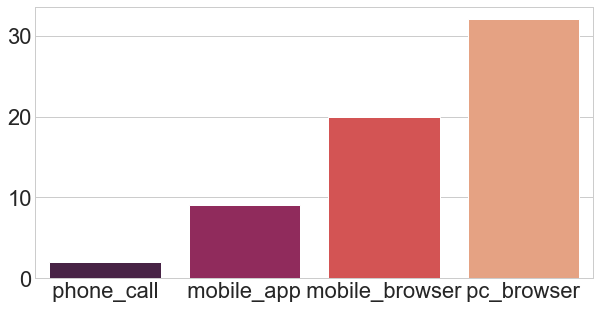

In [58]:
#count the number of devices seen
count = merged_final['device'].value_counts(ascending = True)

#plot
x = count.index
y = count.values
plt.figure(figsize=(10,5))
sns.barplot(x,y,palette='rocket')

Text(0.5, 1.0, 'Fraud Distributions \n (0: No Fraud, 1: Fraud)')

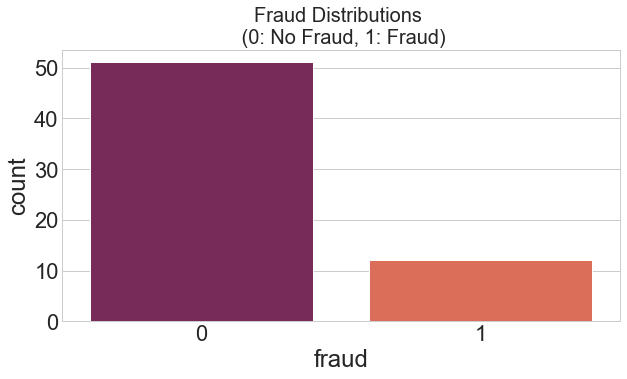

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot('fraud', data=merged_final, palette = 'rocket')
plt.title('Fraud Distributions \n (0: No Fraud, 1: Fraud)', fontsize=20)

In [60]:
#one hot encode
#merged_processed = pd.get_dummies(merged_final, prefix_sep="_", columns=["device", "occupant_gender"])
#merged_processed.head()

Analysing only the fraudulent customers

In [61]:
#fraudulent customers only
fraud_df = merged_final[merged_final['fraud'] == 1]

#renumber index
fraud_df.index = range(fraud_df.shape[0])
fraud_df.head(1)

,occupant_age,customer_id,occupant_gender,transaction_id,device,action,email,gender,age,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,fraud,occupant_first_name,occupant_last_name,holder_first_name,holder_last_name
0,48,2bc68b,male,0baaef67fe8a458,pc_browser,Quote Completed for customer,Loretta Steele@patton-smith.biz,female,48,"73 Edwardfurt, Michelle Crossing Suite",1,301.854949906065,3,1,1,Zachary,Steele,Loretta,Steele


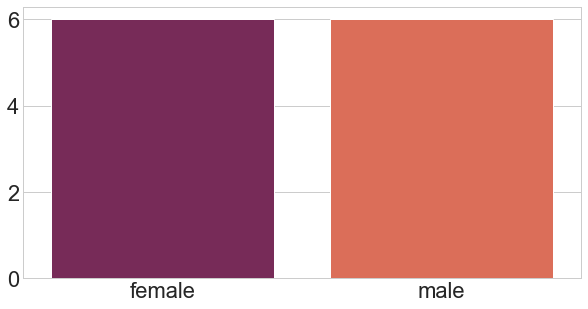

In [62]:
#count the number of genders seen
count = fraud_df['gender'].value_counts(ascending = True)

#plot
x = count.index
y = count.values
plt.figure(figsize=(10,5))
sns.barplot(x,y,palette='rocket')

Gender discrepancies (fraudulent customers only)

In [63]:
#find gender of fraudulent customers and occupants
from genderize import Genderize

#create new df (just for purposes of investigating gender discrepancies)
gender_occupants_df = fraud_df[['occupant_first_name', 'occupant_last_name', 'occupant_gender']]
#gender_df = gender_df.rename(index=str, columns={'gender': 'holder_gender'})

#dataframe of predicted gender for occupants
gender_predict_occupants_df = json_normalize(Genderize().get(gender_occupants_df['occupant_first_name']))['gender']
gender_predict_occupants_df.head()

#join predicted gender with rest of fraud_df
gender_occupants_df = gender_df.join(gender_predict_occupants_df, on = gender_predict_occupants_df.index, rsuffix = '_predicted_occupant')

GenderizeException: ('Request limit too low to process request', 429, {'Server': 'nginx/1.10.3 (Ubuntu)', 'Date': 'Sat, 13 Jul 2019 21:07:53 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '52', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET', 'Access-Control-Allow-Headers': 'Content-Type', 'ETag': 'W/"34-6zB0LTM5onKr49ShxR6lCk/zFcE"'})

In [65]:
gender_occupants_df.head(10)

,occupant_first_name,occupant_last_name,occupant_gender
0,Zachary,Steele,male
1,Nicholas,Steele,male
2,Michael,Steele,female
3,Oscar,Berry,female
4,Mark,Berry,female
5,Jacqueline,Berry,male
6,Mathew,Parsons,female
7,Jennifer,Parsons,female
8,Alexa,Parsons,male
9,Stephen,Ortiz,female
